In [1]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *
sys.path.append('../../src/python')
from PCA import *

In [2]:
data=pd.read_csv('../../data/PAH_PCB_OCP.csv',index_col=0)

In [3]:
kols=PAH_kol+OCP_kol+PCB_kol
df=data.loc[:,kols]

# KORELACIJSKA MATRICA UKUPNA

In [4]:
corr = df.corr()

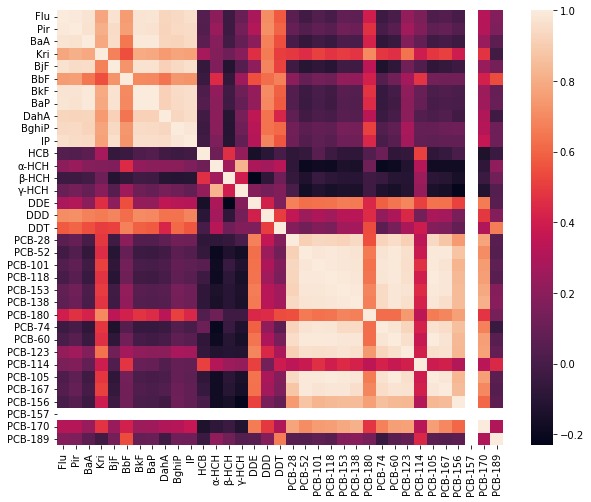

In [5]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr)
plt.show()

# PCB

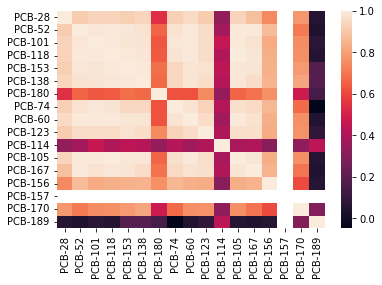

In [6]:
df_PCB=data.loc[:,PCB_kol]
corr_PCB = df_PCB.corr()
sns.heatmap(corr_PCB)
plt.show()

# PAH

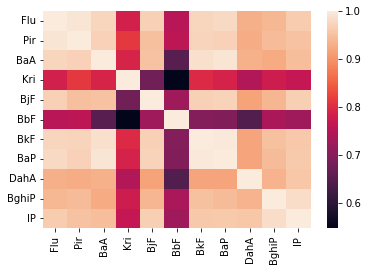

In [7]:
df_PAH=data.loc[:,PAH_kol]
corr_PAH = df_PAH.corr()
sns.heatmap(corr_PAH)
plt.show()

# OCP

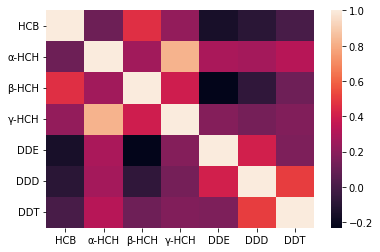

In [8]:
df_OCP=data.loc[:,OCP_kol]
corr_OCP = df_OCP.corr()
sns.heatmap(corr_OCP)
plt.show()

# PROBA

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Pretpostavljamo da je `data` vaš DataFrame i da `kols` sadrži željene stupce
kols = PCB_kol + PAH_kol + OCP_kol  # Ovo će ovisiti o vašem DataFrameu
df = data.loc[:, kols]
corr = df.corr()

# Koristi 1 minus korelacijsku matricu kao udaljenost
dist = 1 - corr.abs()

# Osiguranje da je matrica simetrična i dijagonalni elementi su 0
dist = 0.5 * (dist + dist.T)
np.fill_diagonal(dist.values, 0)

# Hijerarhijski clustering
links = linkage(dist, method='complete')

# Izrada dendrograma i dobivanje redoslijeda
dendro = dendrogram(links, labels=dist.columns, no_plot=True)
reordered_labels = dendro['ivl']

# Sortiranje korelacijske matrice prema redoslijedu iz dendrograma
sorted_corr = corr.loc[reordered_labels, reordered_labels]

# Kreiranje figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [4, 1]})

# Prikaz korelacijske matrice
sns.heatmap(sorted_corr, cmap='coolwarm', annot=True, square=True, ax=ax1)
ax1.set_title('Korelacijska matrica')

# Prikaz dendrograma
dendrogram(links, orientation='left', labels=reordered_labels, ax=ax2)
ax2.yaxis.tick_right()
ax2.set_title('Dendrogram')

plt.show()


ValueError: The condensed distance matrix must contain only finite values.